# Esercitazione 1 Idrologia
### Finotti Jacopo 217936
### Federico Perissini 218299

# Introduzione ai Dati: Precipitazioni di Castel Nuovo del Garda (Vr)

## Importazione delle librerie
Per poter compiere tutte le operazioni necessarie sono state importare alcune librerie, 
contenenti i comandi necessari per elaborare i dati.

In [1]:
import os
import math
import numpy as np
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title
import matplotlib.pyplot as plt
from scipy.stats import genextreme,gumbel_r
from scipy.optimize import least_squares
import plotly.express as px

## Visualizzazione dei dati

A questo punto è possibile visualizzare in una tabella le altezze di precipitazione massime annuali associate ad una durata prefissata.
Nelle colonne, le quali sono state rinominate in quanto nel file originale non avevano dei nomi utili, è possibile visualizzare le durate
mentre ad ogni riga viene associato un anno.

I dati sono stati presi dal sito:

https://www.arpa.veneto.it/dati-ambientali/dati-storici/meteo-idro-nivo/precipit-max?codseq=300000597

In [2]:
data = pd.ExcelFile('DatiCastelNuovoGarda.xlsx')
data.sheet_names
data=data.parse('Foglio1', header=2)
data.columns

#Rinomino delle colonne

data.rename(columns={'Unnamed: 0':'Anno'}, inplace=True)
data.rename(columns={'mm':'1h'}, inplace= True)
data.rename(columns={'mm.1':'3h'}, inplace= True)
data.rename(columns={'mm.2':'6h'}, inplace= True)
data.rename(columns={'mm.3':'12h'}, inplace= True)
data.rename(columns={'mm.4':'24h'}, inplace= True)
#data.drop(columns=["Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"], inplace=True)

#cambio del titolo dell'indice

data.set_index('Anno', inplace= True)

data

,1h,3h,6h,12h,24h
Anno,,,,,
1992,35.4,52.2,52.8,59.4,69.0
1993,31.8,35.0,38.8,43.8,46.8
1994,29.0,34.2,41.6,52.2,70.2
1995,36.4,36.4,36.4,36.4,69.4
1996,50.4,62.0,64.2,64.2,64.2
1997,29.6,35.6,48.8,48.8,49.6
1998,35.4,42.2,42.4,42.8,50.2
1999,31.6,31.6,40.0,56.2,63.0
2000,26.8,32.6,35.8,57.6,65.0


## Grafico dell'andamento delle precipitazioni

Tramite il seguente grafico è possibile osservare l'andamento delle precipitazioni nel corso dei diversi anni, 
verificando così quali siano gli anni più piovosi e quali meno. 

[None, None]

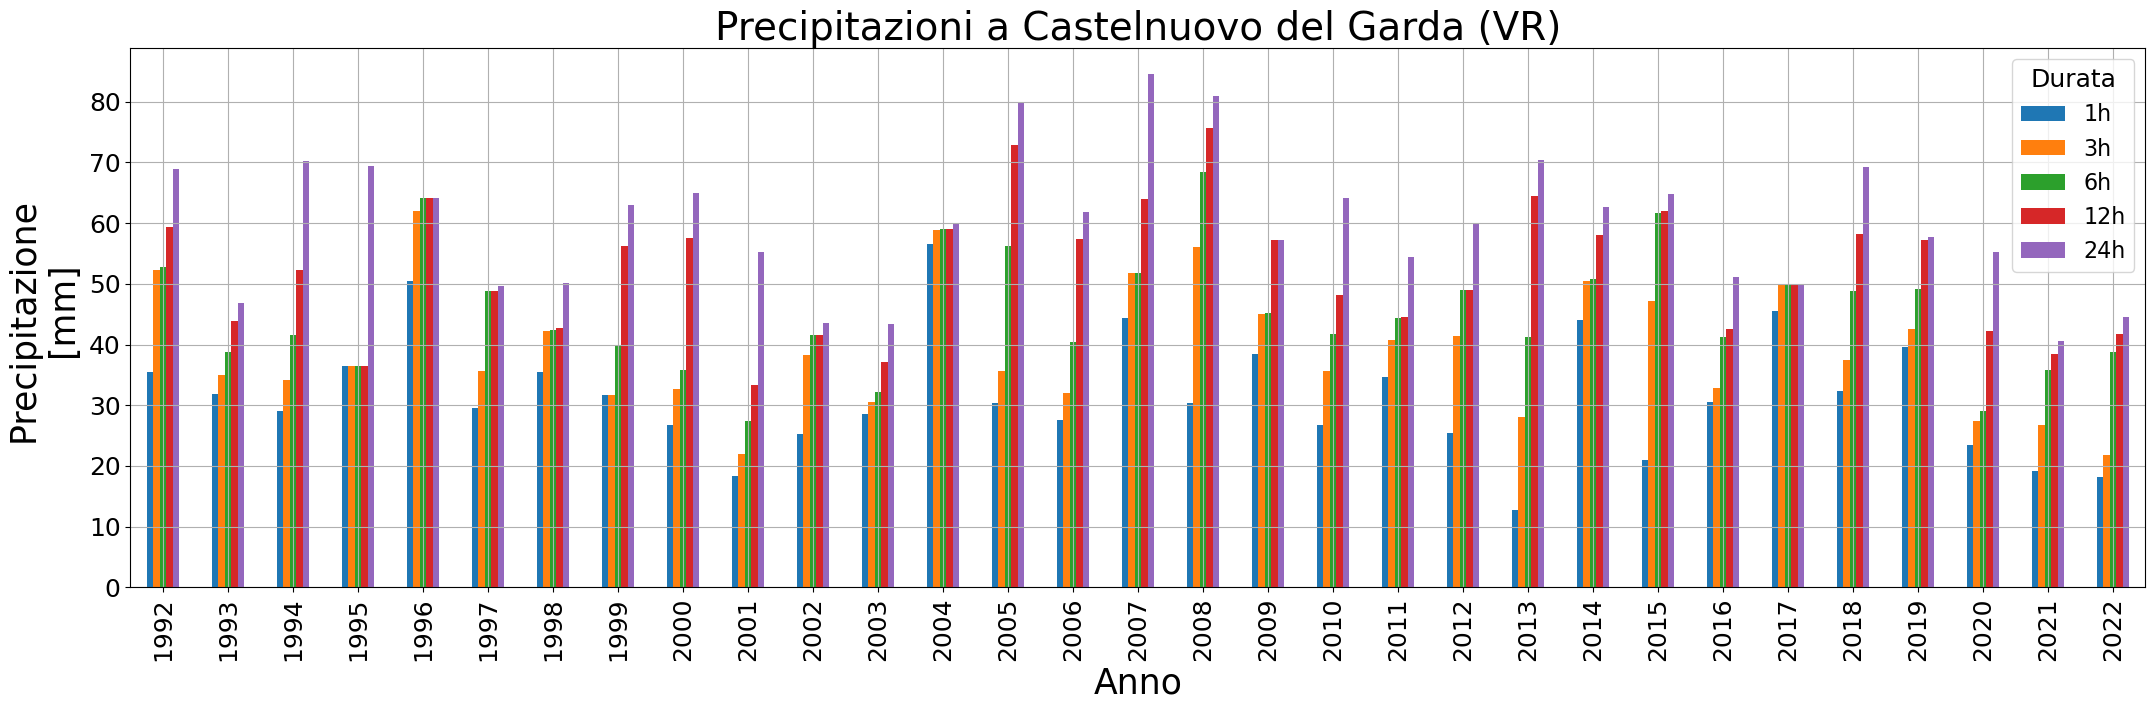

In [19]:
ax=data.plot.bar(title="Precipitazioni a Castelnuovo del Garda (VR)", figsize=(26,7), fontsize=18)
ax.title.set_size(28)
ax.grid()
ax.set_ylabel("Precipitazione \n [mm]", fontsize=25)
ax.set_xlabel("Anno", fontsize=25)
legend= ax.legend(title='Durata', fontsize=16)
plt.setp(legend.get_title(), fontsize=18)



## Grafico tipo: "box" delle precipitazioni

Text(0.5, 0, 'Fasce orarie \n [h]')

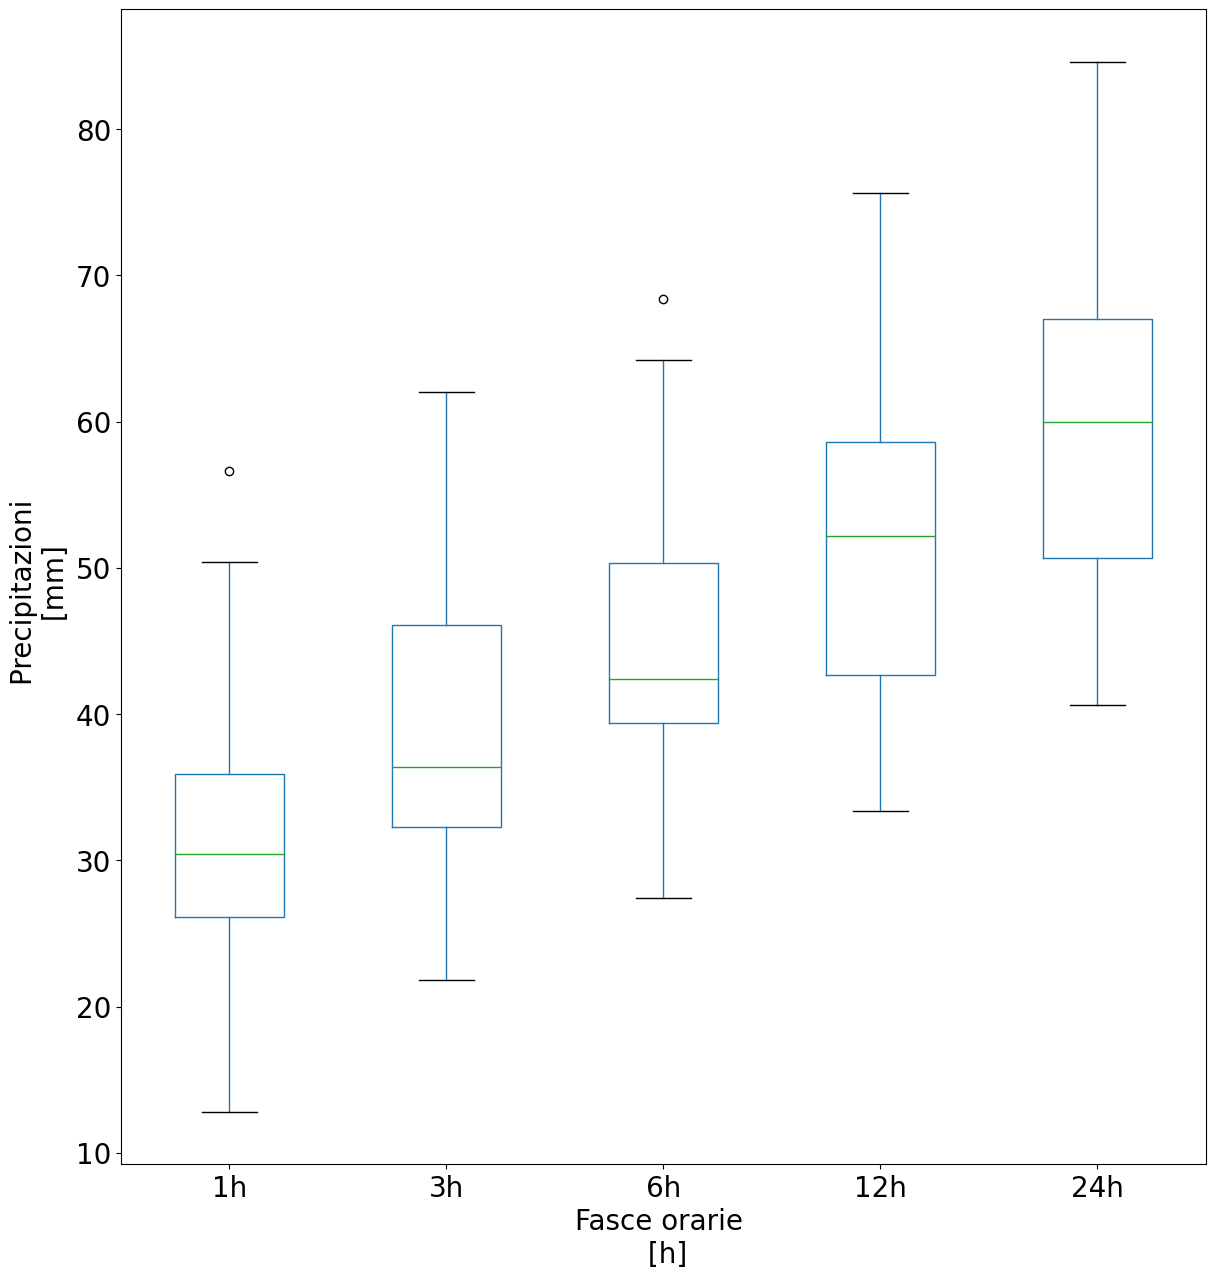

In [20]:
ax=data.plot(kind="box", figsize=(14,15), fontsize=20) # controllare dimensioni 
ax.set_ylabel("Precipitazioni \n [mm]", fontsize=20)
ax.set_xlabel("Fasce orarie \n [h]", fontsize=20)

## Istogramma delle precipitazioni per ogni fascia oraria.

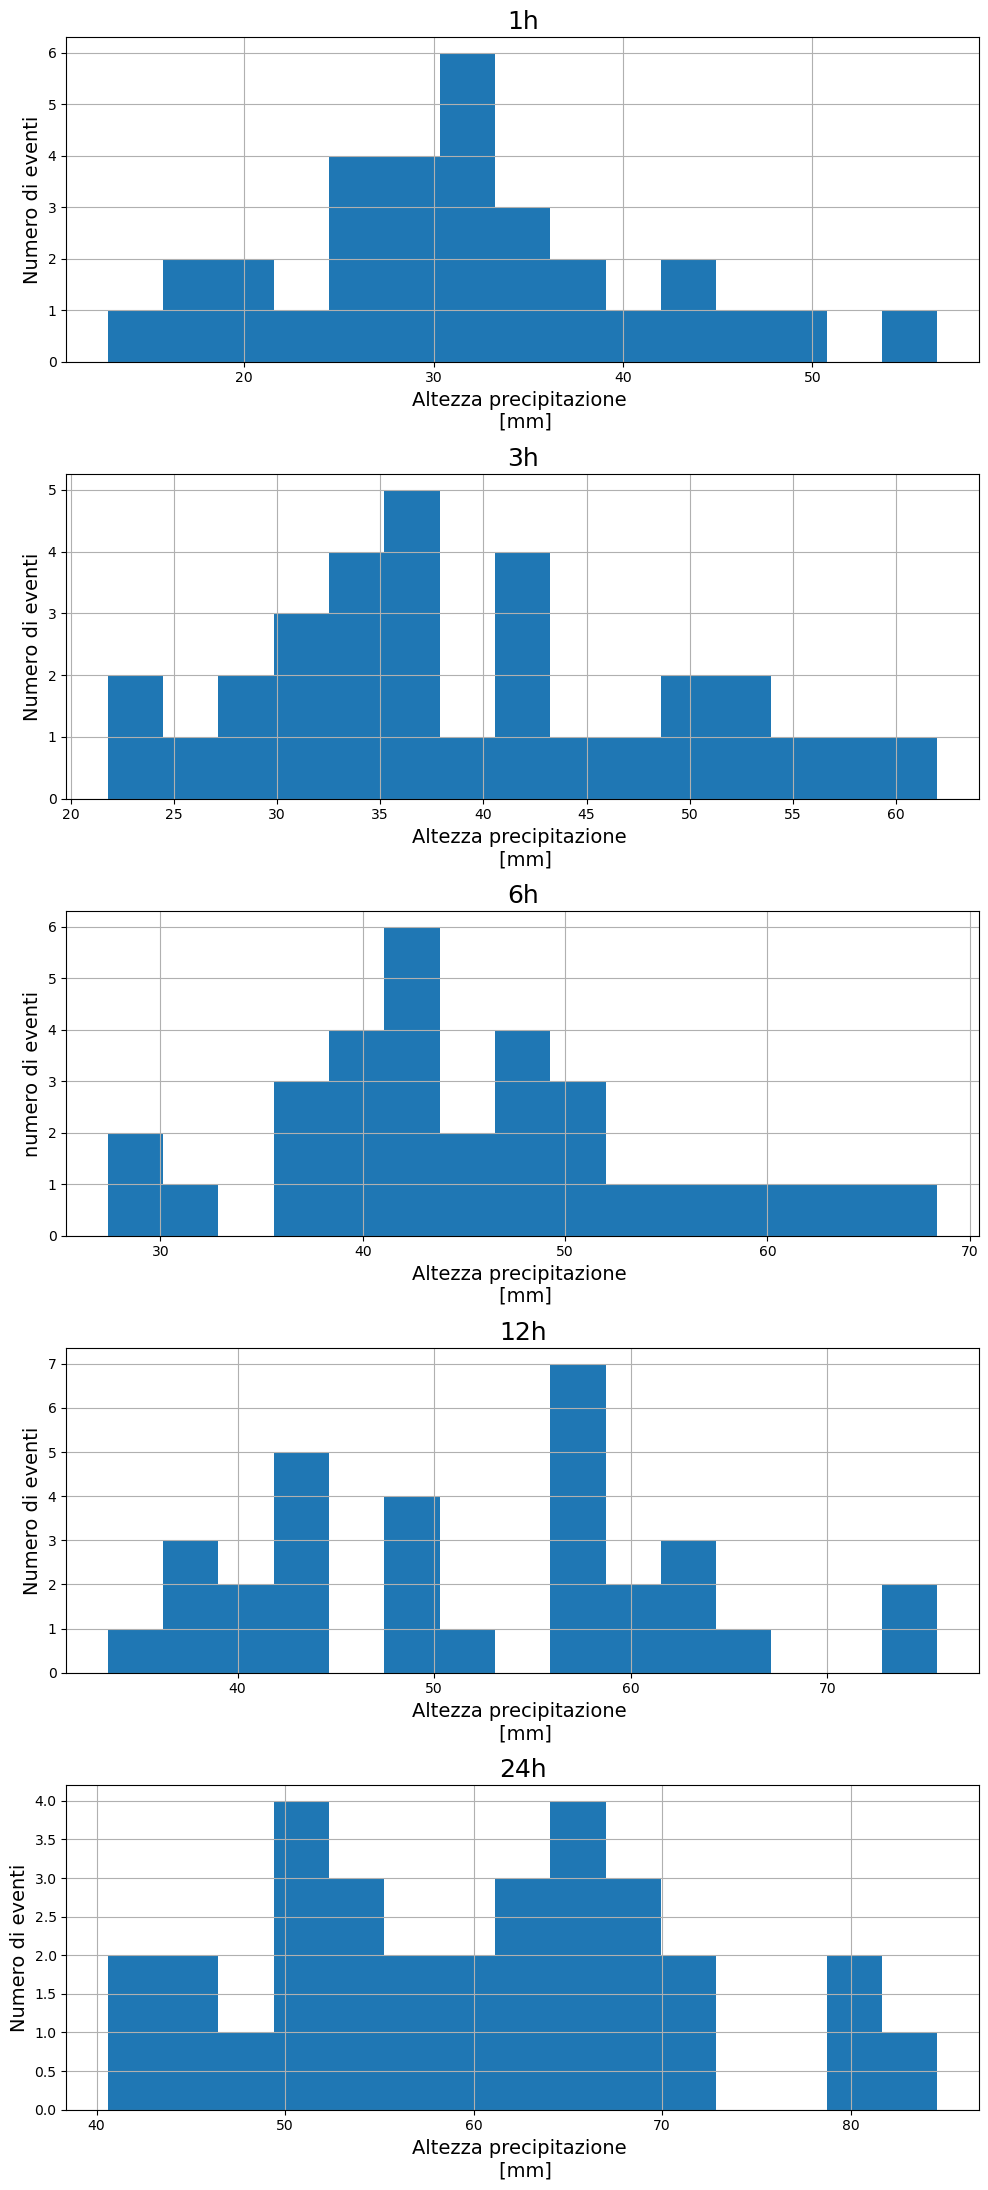

In [21]:
fig, ax = plt.subplots(5,figsize=(10,22))

data[["1h"]].hist(bins=15,ax = ax[0])
ax[0].set_xlabel("Altezza precipitazione \n [mm]", fontsize = 14)
ax[0].set_ylabel("Numero di eventi", fontsize = 14)
ax[0].set_title("1h", fontsize = 18)

data[["3h"]].hist(bins=15,figsize=(15,15),ax = ax[1])
ax[1].set_xlabel("Altezza precipitazione \n [mm]", fontsize = 14)
ax[1].set_ylabel("Numero di eventi", fontsize = 14)
ax[1].set_title("3h", fontsize = 18)

data[["6h"]].hist(bins=15,figsize=(15,15),ax = ax[2])
ax[2].set_xlabel("Altezza precipitazione \n [mm]", fontsize = 14)
ax[2].set_ylabel("numero di eventi", fontsize = 14)
ax[2].set_title("6h", fontsize = 18)

data[["12h"]].hist(bins=15,figsize=(15,15),ax = ax[3])
ax[3].set_xlabel("Altezza precipitazione \n [mm]", fontsize = 14)
ax[3].set_ylabel("Numero di eventi", fontsize = 14)
ax[3].set_title("12h", fontsize = 18)

data[["24h"]].hist(bins=15,figsize=(15,15),ax = ax[4])
ax[4].set_xlabel("Altezza precipitazione \n [mm]", fontsize = 14)
ax[4].set_ylabel("Numero di eventi", fontsize = 14)
ax[4].set_title("24h", fontsize = 18)

plt.tight_layout()